# Display the first 5 rows of the dataset

In [3]:
%pip install seaborn

In [4]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#loading a dataset 
df= pd.read_csv('iris.csv')

In [8]:
#Cleaning Dataset and creating new dataframe where we will resolve inconsistent values
modified_df= df.columns[0].replace('"','').split(',')

In [9]:
#Loading Modified dataframe into Original dataframe
df[modified_df] = df.iloc[:,0].str.split(',', expand=True)

In [10]:
#dropping a dataframe whi's column has an index of 0 from original dataset
df.drop(df.columns[0], axis= 1, inplace= True)

-->Strip double quotes in values inside our dataset

In [11]:
df["variety"]= df["variety"].str.strip('""')

-->Calling and also displaying only the first 5 rows of our dataset

In [12]:
#Display the first 5 rows of the dataset
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,.2,Setosa
1,4.9,3,1.4,.2,Setosa
2,4.7,3.2,1.3,.2,Setosa
3,4.6,3.1,1.5,.2,Setosa
4,5,3.6,1.4,.2,Setosa


# Check for missing values and handling them appropriately

-->Check the total number of null values in the dataset

In [13]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

-->Since we don't have null values, we now checking empty rows by replacing every empty row with NA

In [14]:
df.replace('',pd.NA, inplace=True)

-->Since we made a permanent change in the dataset, we check again the total number of null values in dataset

In [15]:
df.isnull().sum()

sepal.length    1
sepal.width     1
petal.length    2
petal.width     1
variety         1
dtype: int64

-->Now we drop all rows with null values, permanently.

In [16]:
df.dropna(inplace=True)

-->We check if the dataset have any duplicated values, we want total number of duplicates.

In [17]:
df.duplicated().sum()

1

-->We drop that duplicate permanently in the dataset.

In [18]:
df.drop_duplicates(inplace=True)

# Perform basic statistics on the dataset

In [19]:
#Compute basic statistics 
df.describe()

,sepal.length,sepal.width,petal.length,petal.width,variety
count,144,144,144,144,144
unique,35,23,43,22,3
top,5,3,1.4,.2,Setosa
freq,10,26,13,29,49


--> We Convert numerical columns to appropriate data types

In [20]:
df['sepal.length'] = df['sepal.length'].astype(float)
df['sepal.width'] = df['sepal.width'].astype(float)
df['petal.length'] = df['petal.length'].astype(float)
df['petal.width'] =df['petal.width'].astype(float)

In [21]:
#Remove 'variety' column from the DataFrame
df_without_variety = df.drop(columns=['variety'])

In [22]:
#Calculate statistics for numerical columns
statistics = df_without_variety.describe()

In [23]:
#Call statistics
statistics

,sepal.length,sepal.width,petal.length,petal.width
count,144.000000,144.000000,144.000000,144.000000
mean,5.830556,3.060417,3.725694,1.184028
std,0.835261,0.435363,1.771718,0.763839
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualize the distribution of each feature

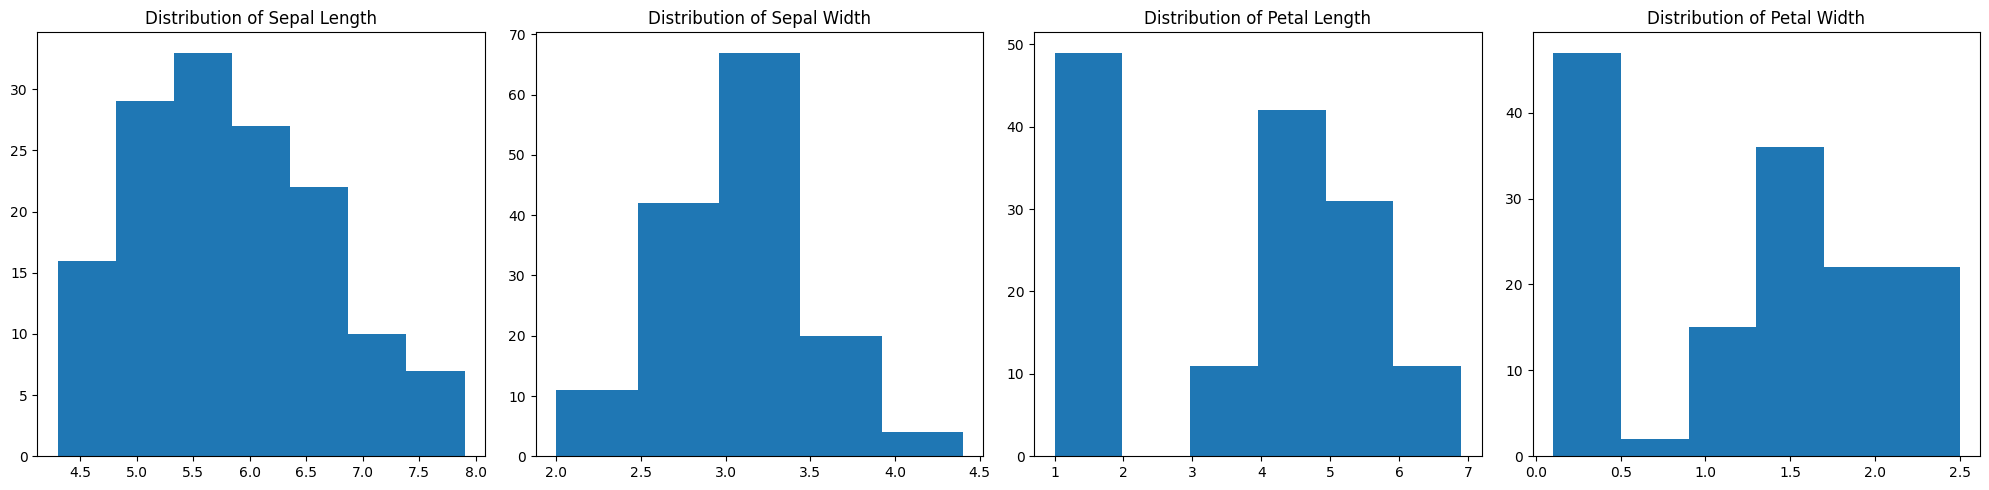

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  

axes[0].set_title("Distribution of Sepal Length")
axes[0].hist(df['sepal.length'].astype(float), bins=7)
axes[0].grid(False)

axes[1].set_title("Distribution of Sepal Width")
axes[1].hist(df['sepal.width'].astype(float), bins=5)
axes[1].grid(False)

axes[2].set_title("Distribution of Petal Length")
axes[2].hist(df['petal.length'].astype(float), bins=6)
axes[2].grid(False)

axes[3].set_title("Distribution of Petal Width")
axes[3].hist(df['petal.width'].astype(float), bins=6)
axes[3].grid(False)

plt.tight_layout()  
plt.show()

# The relationship between features and the target variable

C:\Users\mademow\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


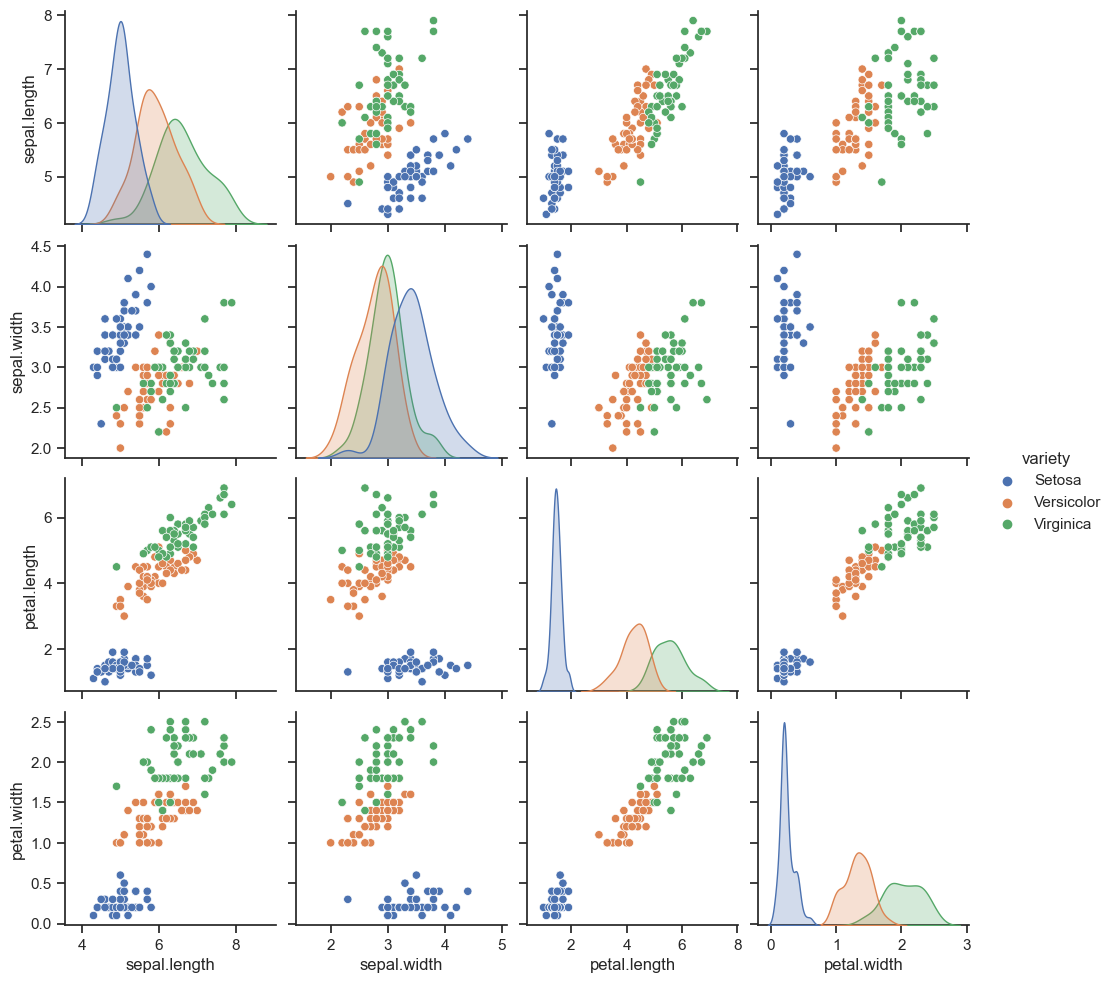

In [17]:
import seaborn as sns

#Set style for seaborn
sns.set(style="ticks")

#Create pair plot
sns.pairplot(df, hue="variety", diag_kind="kde")
plt.show()